## Visualize Results

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
# read yearly mean ndvi data
ndvi_BL = pd.read_csv("./Tables/Spatial_Means/NDVI_Yearly_Spatial_Means_BL.csv")
ndvi_NL = pd.read_csv("./Tables/Spatial_Means/NDVI_Yearly_Spatial_Means_NL.csv")

In [4]:
# add column with year
ndvi_BL["year"] = ndvi_BL["time"].str[0:4].astype(int)
ndvi_NL["year"] = ndvi_NL["time"].str[0:4].astype(int)

In [5]:
# calculate trend lines
# treat years 1981-1999 and 2000-2024 seperately because of large differences between AVHRR and MODIS datasets
ndvi_avhrr_BL = ndvi_BL[(ndvi_BL['year'] >= 1981) & (ndvi_BL['year'] <= 1999)]
ndvi_modis_BL = ndvi_BL[(ndvi_BL['year'] >= 2000) & (ndvi_BL['year'] <= 2024)]
ndvi_avhrr_NL = ndvi_NL[(ndvi_NL['year'] >= 1981) & (ndvi_NL['year'] <= 1999)]
ndvi_modis_NL = ndvi_NL[(ndvi_NL['year'] >= 2000) & (ndvi_NL['year'] <= 2024)]

# get equation for trendline
fit_ndvi_avhrr_BL = np.polyfit(ndvi_avhrr_BL["year"], ndvi_avhrr_BL["GER"], 1)
fit_ndvi_modis_BL = np.polyfit(ndvi_modis_BL["year"], ndvi_modis_BL["GER"], 1)
fit_ndvi_avhrr_NL = np.polyfit(ndvi_avhrr_NL["year"], ndvi_avhrr_NL["GER"], 1)
fit_ndvi_modis_NL = np.polyfit(ndvi_modis_NL["year"], ndvi_modis_NL["GER"], 1)

fit_ndvi_avhrr_BL_fun = np.poly1d(fit_ndvi_avhrr_BL)
fit_ndvi_modis_BL_fun = np.poly1d(fit_ndvi_modis_BL)
fit_ndvi_avhrr_NL_fun = np.poly1d(fit_ndvi_avhrr_NL)
fit_ndvi_modis_NL_fun = np.poly1d(fit_ndvi_modis_NL)

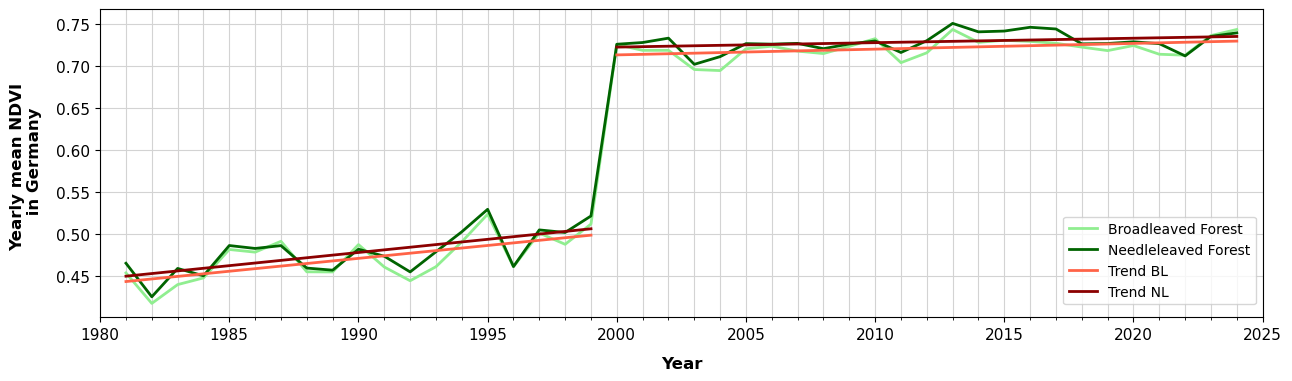

In [6]:
# plot evolution of yearly NDVI across time
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('year', 'GER', data=ndvi_BL, color='lightgreen', linewidth=2, linestyle='-', label="Broadleaved Forest")
ax.plot('year', 'GER', data=ndvi_NL, color='darkgreen', linewidth=2, linestyle='-', label="Needleleaved Forest")
ax.plot(ndvi_avhrr_BL["year"], fit_ndvi_avhrr_BL_fun(ndvi_avhrr_BL['year']), color='tomato', linewidth=2, linestyle='-', label = "Trend BL")
ax.plot(ndvi_modis_BL["year"], fit_ndvi_modis_BL_fun(ndvi_modis_BL['year']), color='tomato', linewidth=2, linestyle='-')
ax.plot(ndvi_avhrr_NL["year"], fit_ndvi_avhrr_NL_fun(ndvi_avhrr_NL['year']), color='darkred', linewidth=2, linestyle='-', label = "Trend NL")
ax.plot(ndvi_modis_NL["year"], fit_ndvi_modis_NL_fun(ndvi_modis_NL['year']), color='darkred', linewidth=2, linestyle='-')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean NDVI \n in Germany', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(1, 0.35))
plt.savefig("./Figures/NDVI_Yearly_GER.png", bbox_inches="tight")

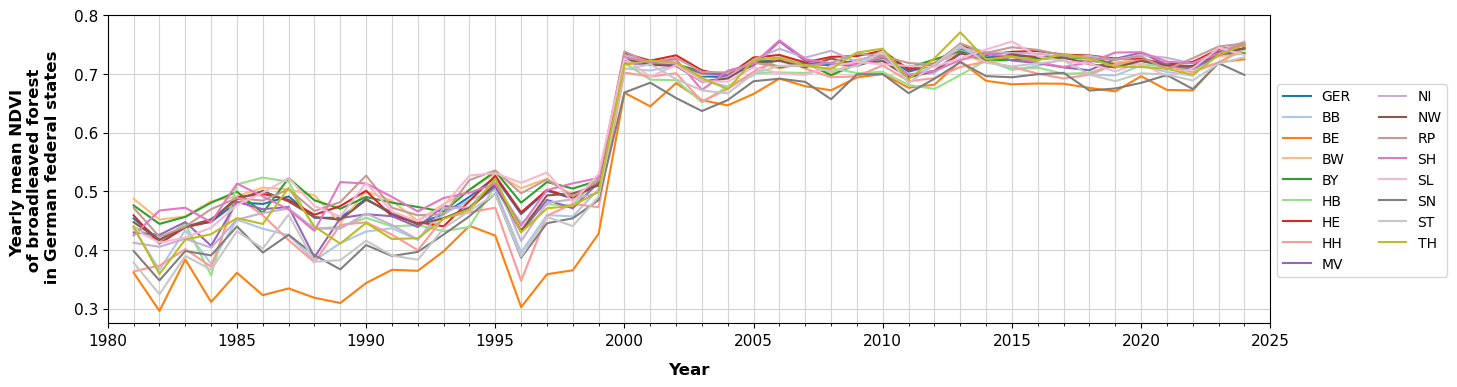

In [7]:
# plot evolution of yearly NDVI in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
ndvi_BL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean NDVI \n of broadleaved forest \n in German federal states', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.275, 0.8)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/NDVI_Yearly_States_BL.png", bbox_inches="tight")

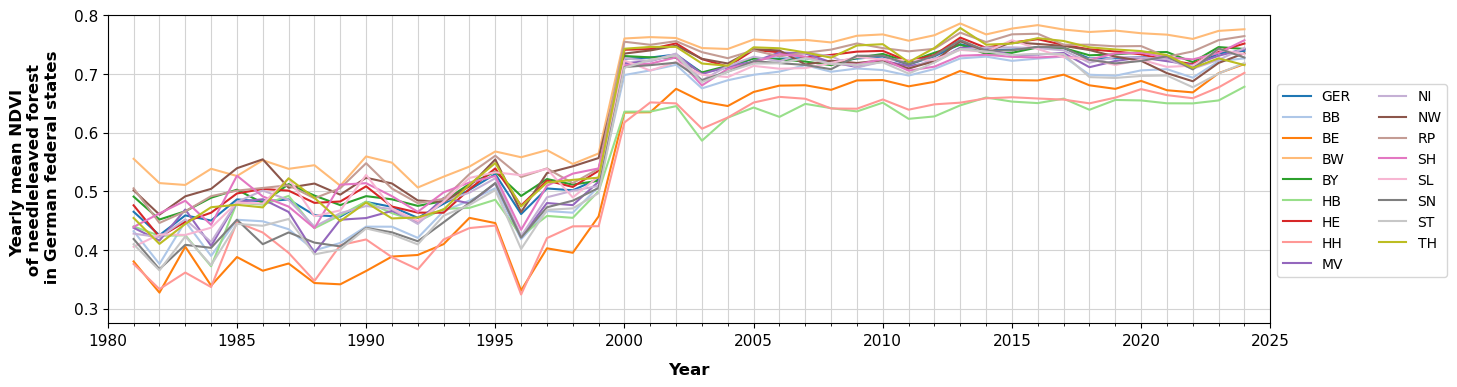

In [8]:
# plot evolution of yearly NDVI in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
ndvi_NL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean NDVI \n of needleleaved forest \n in German federal states', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.275, 0.8)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/NDVI_Yearly_States_NL.png", bbox_inches="tight")

In [9]:
# read yearly mean fapar data
fapar_BL = pd.read_csv("./Tables/Spatial_Means/FAPAR_Yearly_Spatial_Means_BL.csv")
fapar_NL = pd.read_csv("./Tables/Spatial_Means/FAPAR_Yearly_Spatial_Means_NL.csv")

In [10]:
# add column with year
fapar_BL["year"] = fapar_BL["time"].str[0:4].astype(int)
fapar_NL["year"] = fapar_NL["time"].str[0:4].astype(int)

In [11]:
# calculate trend lines
# treat years 1981-1999 and 2000-2024 seperately because of large differences between AVHRR and MODIS datasets
fapar_avhrr_BL = fapar_BL[(fapar_BL['year'] >= 1981) & (fapar_BL['year'] <= 1999)]
fapar_modis_BL = fapar_BL[(fapar_BL['year'] >= 2000) & (fapar_BL['year'] <= 2024)]
fapar_avhrr_NL = fapar_NL[(fapar_NL['year'] >= 1981) & (fapar_NL['year'] <= 1999)]
fapar_modis_NL = fapar_NL[(fapar_NL['year'] >= 2000) & (fapar_NL['year'] <= 2024)]

# get equation for trendline
fit_fapar_avhrr_BL = np.polyfit(fapar_avhrr_BL["year"], fapar_avhrr_BL["GER"], 1)
fit_fapar_modis_BL = np.polyfit(fapar_modis_BL["year"], fapar_modis_BL["GER"], 1)
fit_fapar_avhrr_NL = np.polyfit(fapar_avhrr_NL["year"], fapar_avhrr_NL["GER"], 1)
fit_fapar_modis_NL = np.polyfit(fapar_modis_NL["year"], fapar_modis_NL["GER"], 1)

fit_fapar_avhrr_BL_fun = np.poly1d(fit_fapar_avhrr_BL)
fit_fapar_modis_BL_fun = np.poly1d(fit_fapar_modis_BL)
fit_fapar_avhrr_NL_fun = np.poly1d(fit_fapar_avhrr_NL)
fit_fapar_modis_NL_fun = np.poly1d(fit_fapar_modis_NL)

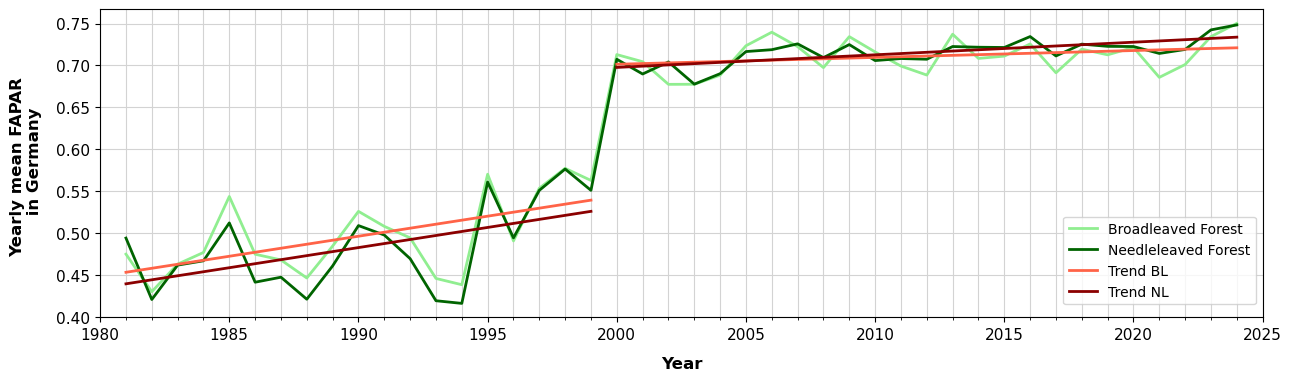

In [12]:
# plot evolution of yearly fapar across time
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('year', 'GER', data=fapar_BL, color='lightgreen', linewidth=2, linestyle='-', label="Broadleaved Forest")
ax.plot('year', 'GER', data=fapar_NL, color='darkgreen', linewidth=2, linestyle='-', label="Needleleaved Forest")
ax.plot(fapar_avhrr_BL["year"], fit_fapar_avhrr_BL_fun(fapar_avhrr_BL['year']), color='tomato', linewidth=2, linestyle='-', label = "Trend BL")
ax.plot(fapar_modis_BL["year"], fit_fapar_modis_BL_fun(fapar_modis_BL['year']), color='tomato', linewidth=2, linestyle='-')
ax.plot(fapar_avhrr_NL["year"], fit_fapar_avhrr_NL_fun(fapar_avhrr_NL['year']), color='darkred', linewidth=2, linestyle='-', label = "Trend NL")
ax.plot(fapar_modis_NL["year"], fit_fapar_modis_NL_fun(fapar_modis_NL['year']), color='darkred', linewidth=2, linestyle='-')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean FAPAR \n in Germany', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(1, 0.35))
plt.savefig("./Figures/FAPAR_Yearly_GER.png", bbox_inches="tight")

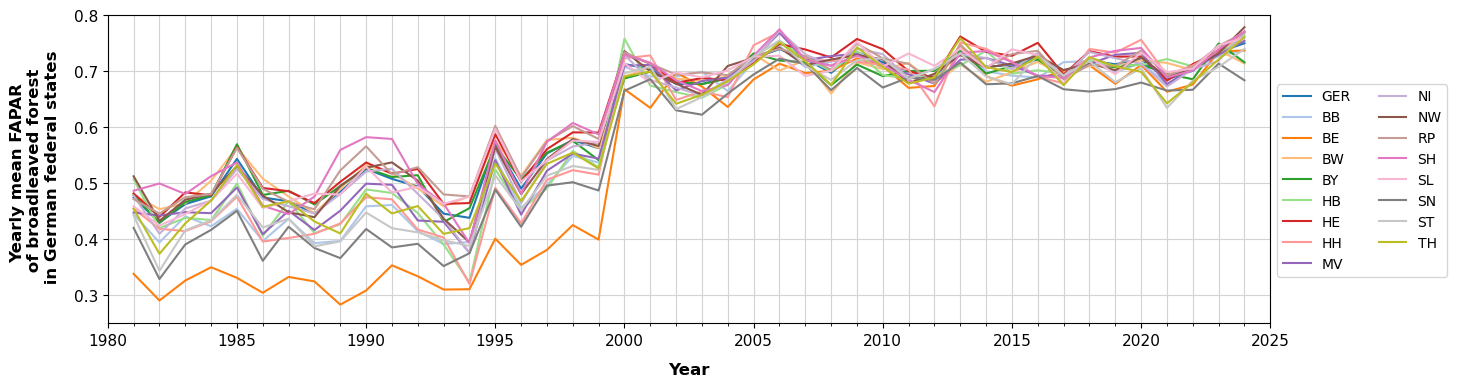

In [13]:
# plot evolution of yearly FAPAR in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
fapar_BL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean FAPAR \n of broadleaved forest \n in German federal states', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.25, 0.8)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/FAPAR_Yearly_States_BL.png", bbox_inches="tight")

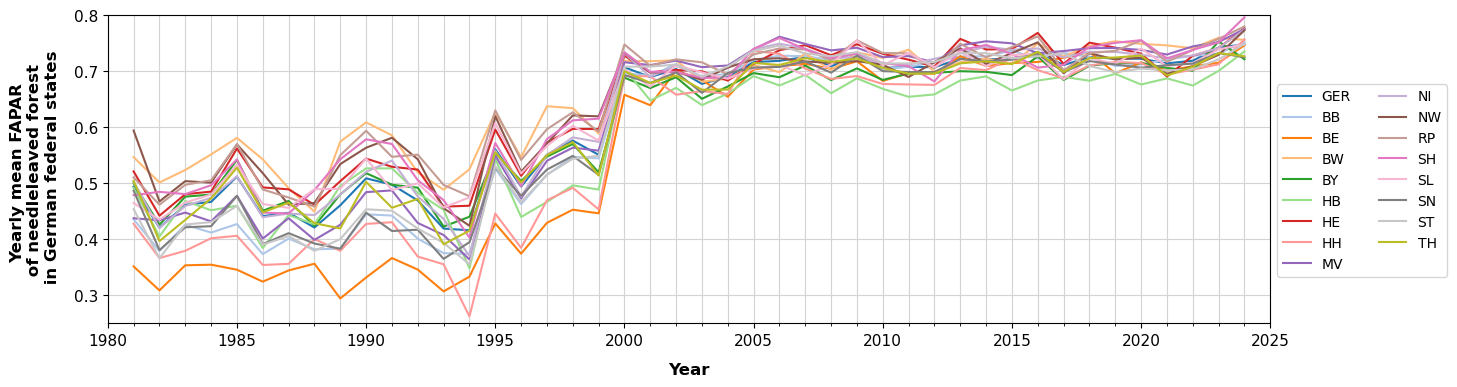

In [14]:
# plot evolution of yearly FAPAR in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
fapar_NL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean FAPAR \n of needleleaved forest \n in German federal states', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.25, 0.8)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/FAPAR_Yearly_States_NL.png", bbox_inches="tight")

In [15]:
# read yearly mean lai data
lai_BL = pd.read_csv("./Tables/Spatial_Means/LAI_Yearly_Spatial_Means_BL.csv")
lai_NL = pd.read_csv("./Tables/Spatial_Means/LAI_Yearly_Spatial_Means_NL.csv")

In [16]:
# add column with year
lai_BL["year"] = lai_BL["time"].str[0:4].astype(int)
lai_NL["year"] = lai_NL["time"].str[0:4].astype(int)

In [17]:
# calculate trend lines
# treat years 1981-1999 and 2000-2024 seperately because of large differences between AVHRR and MODIS datasets
lai_avhrr_BL = lai_BL[(lai_BL['year'] >= 1981) & (lai_BL['year'] <= 1999)]
lai_modis_BL = lai_BL[(lai_BL['year'] >= 2000) & (lai_BL['year'] <= 2024)]
lai_avhrr_NL = lai_NL[(lai_NL['year'] >= 1981) & (lai_NL['year'] <= 1999)]
lai_modis_NL = lai_NL[(lai_NL['year'] >= 2000) & (lai_NL['year'] <= 2024)]

# get equation for trendline
fit_lai_avhrr_BL = np.polyfit(lai_avhrr_BL["year"], lai_avhrr_BL["GER"], 1)
fit_lai_modis_BL = np.polyfit(lai_modis_BL["year"], lai_modis_BL["GER"], 1)
fit_lai_avhrr_NL = np.polyfit(lai_avhrr_NL["year"], lai_avhrr_NL["GER"], 1)
fit_lai_modis_NL = np.polyfit(lai_modis_NL["year"], lai_modis_NL["GER"], 1)

fit_lai_avhrr_BL_fun = np.poly1d(fit_lai_avhrr_BL)
fit_lai_modis_BL_fun = np.poly1d(fit_lai_modis_BL)
fit_lai_avhrr_NL_fun = np.poly1d(fit_lai_avhrr_NL)
fit_lai_modis_NL_fun = np.poly1d(fit_lai_modis_NL)

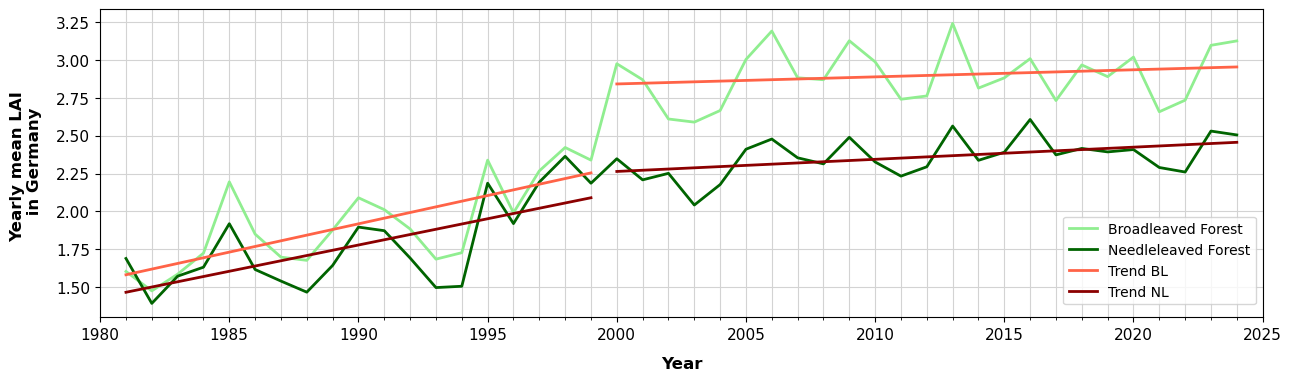

In [18]:
# plot evolution of yearly lai across time
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('year', 'GER', data=lai_BL, color='lightgreen', linewidth=2, linestyle='-', label="Broadleaved Forest")
ax.plot('year', 'GER', data=lai_NL, color='darkgreen', linewidth=2, linestyle='-', label="Needleleaved Forest")
ax.plot(lai_avhrr_BL["year"], fit_lai_avhrr_BL_fun(lai_avhrr_BL['year']), color='tomato', linewidth=2, linestyle='-', label = "Trend BL")
ax.plot(lai_modis_BL["year"], fit_lai_modis_BL_fun(lai_modis_BL['year']), color='tomato', linewidth=2, linestyle='-')
ax.plot(lai_avhrr_NL["year"], fit_lai_avhrr_NL_fun(lai_avhrr_NL['year']), color='darkred', linewidth=2, linestyle='-', label = "Trend NL")
ax.plot(lai_modis_NL["year"], fit_lai_modis_NL_fun(lai_modis_NL['year']), color='darkred', linewidth=2, linestyle='-')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean LAI \n in Germany', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(1, 0.35))
plt.savefig("./Figures/LAI_Yearly_GER.png", bbox_inches="tight")

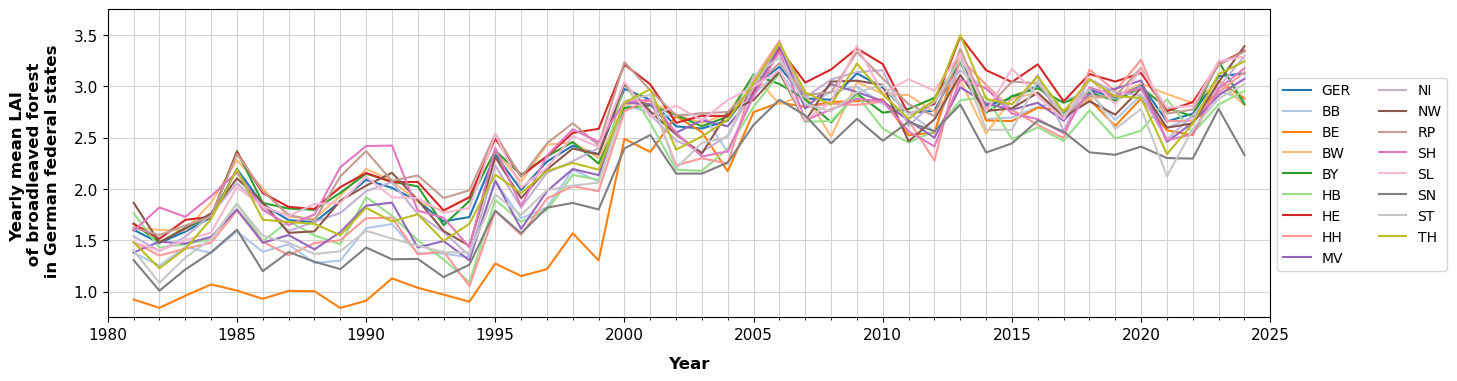

In [19]:
# plot evolution of yearly LAI in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
lai_BL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean LAI \n of broadleaved forest \n in German federal states', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.75, 3.75)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/LAI_Yearly_States_BL.png", bbox_inches="tight")

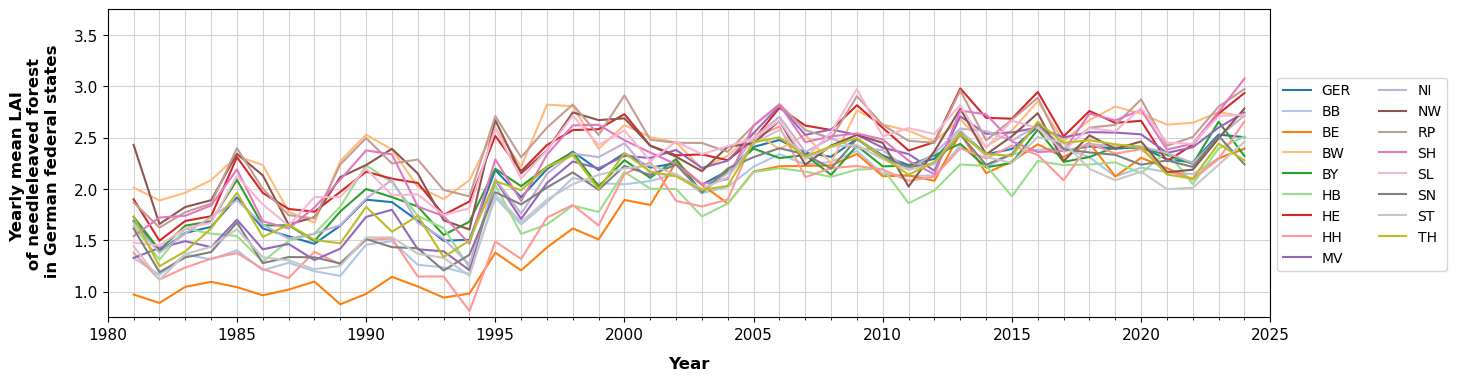

In [20]:
# plot evolution of yearly LAI in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
lai_NL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean LAI \n of needleleaved forest \n in German federal states', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.75, 3.75)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/LAI_Yearly_States_NL.png", bbox_inches="tight")

In [21]:
# read yearly mean air temperature data
t2m_BL = pd.read_csv("./Tables/Spatial_Means/Temperature_Yearly_Spatial_Means_BL.csv")
t2m_NL = pd.read_csv("./Tables/Spatial_Means/Temperature_Yearly_Spatial_Means_NL.csv")

In [22]:
# add column with year
t2m_BL["year"] = t2m_BL["time"].str[0:4].astype(int)
t2m_NL["year"] = t2m_NL["time"].str[0:4].astype(int)

In [23]:
# calculate trend lines
# get equation for trendline
fit_t2m_BL = np.polyfit(t2m_BL["year"], t2m_BL["GER"], 1)
fit_t2m_NL = np.polyfit(t2m_NL["year"], t2m_NL["GER"], 1)

fit_t2m_BL_fun = np.poly1d(fit_t2m_BL)
fit_t2m_NL_fun = np.poly1d(fit_t2m_NL)

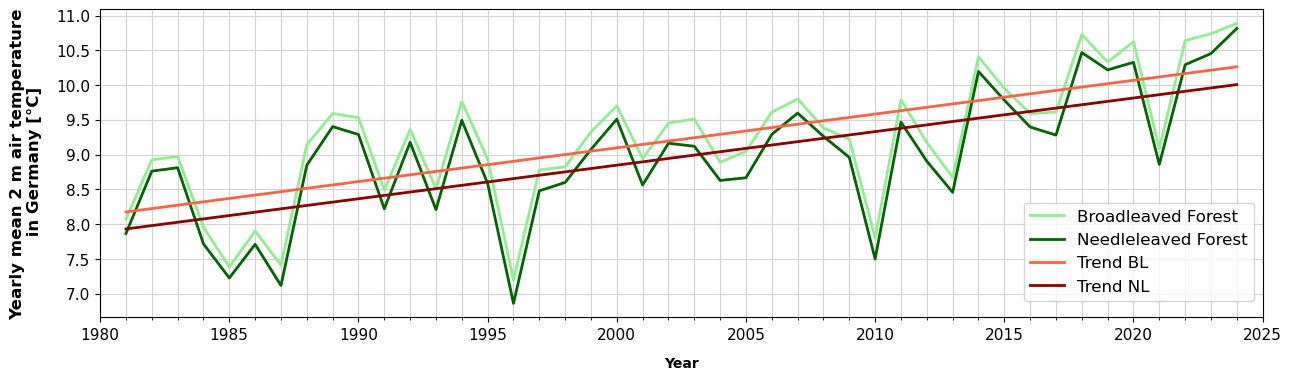

In [24]:
# plot evolution of yearly air temperature across time
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('year', 'GER', data=t2m_BL, color='lightgreen', linewidth=2, linestyle='-', label="Broadleaved Forest")
ax.plot('year', 'GER', data=t2m_NL, color='darkgreen', linewidth=2, linestyle='-', label="Needleleaved Forest")
ax.plot(t2m_BL["year"], fit_t2m_BL_fun(t2m_BL['year']), color='tomato', linewidth=2, linestyle='-', label = "Trend BL")
ax.plot(t2m_NL["year"], fit_t2m_NL_fun(t2m_NL['year']), color='darkred', linewidth=2, linestyle='-', label = "Trend NL")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean 2 m air temperature\n in Germany [°C]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=10, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=12,  bbox_to_anchor=(1, 0.4))
plt.savefig("./Figures/Temperature_Yearly_GER.png", bbox_inches="tight")

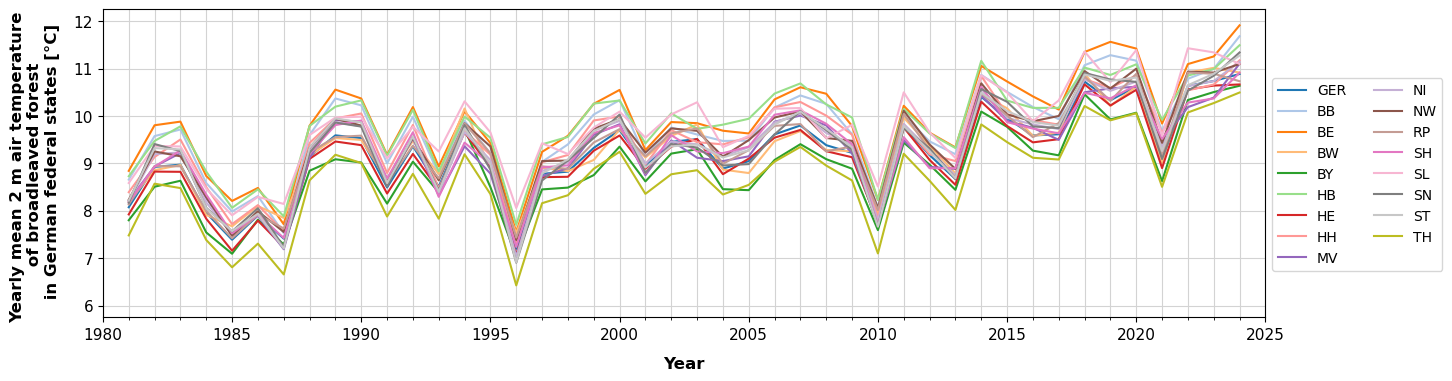

In [25]:
# plot evolution of yearly air temperature in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
t2m_BL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean 2 m air temperature \n of broadleaved forest \n in German federal states [°C]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(5.75, 12.25)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/Temperature_Yearly_States_BL.png", bbox_inches="tight")

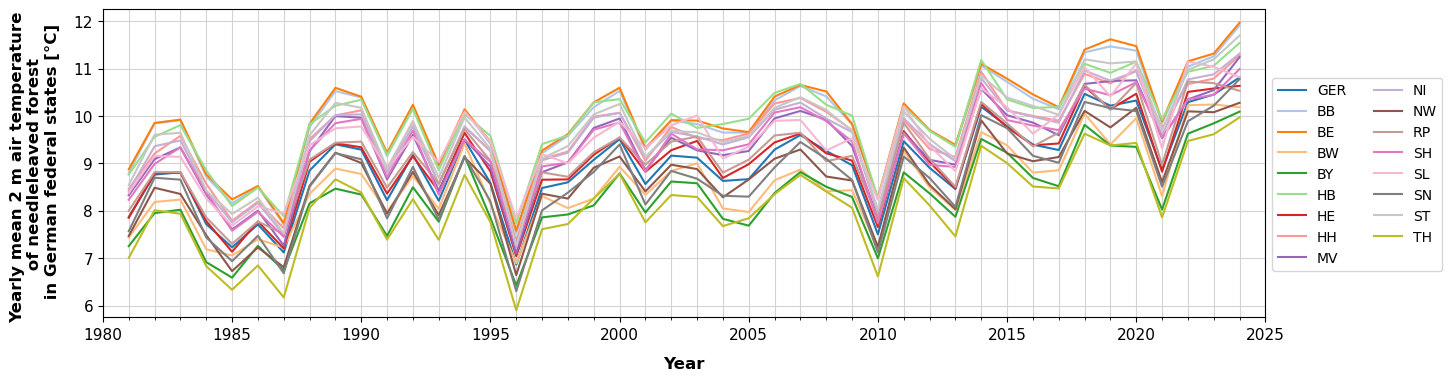

In [26]:
# plot evolution of yearly air temperature in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
t2m_NL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean 2 m air temperature \n of needleleaved forest \n in German federal states [°C]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(5.75, 12.25)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/Temperature_Yearly_States_NL.png", bbox_inches="tight")

In [27]:
# read yearly mean wind speed data
wind_BL = pd.read_csv("./Tables/Spatial_Means/Windspeed_Yearly_Spatial_Means_BL.csv")
wind_NL = pd.read_csv("./Tables/Spatial_Means/Windspeed_Yearly_Spatial_Means_NL.csv")

In [28]:
# add column with year
wind_BL["year"] = wind_BL["time"].str[0:4].astype(int)
wind_NL["year"] = wind_NL["time"].str[0:4].astype(int)

In [29]:
# calculate trend lines
# get equation for trendline
fit_wind_BL = np.polyfit(wind_BL["year"], wind_BL["GER"], 1)
fit_wind_NL = np.polyfit(wind_NL["year"], wind_NL["GER"], 1)

fit_wind_BL_fun = np.poly1d(fit_wind_BL)
fit_wind_NL_fun = np.poly1d(fit_wind_NL)

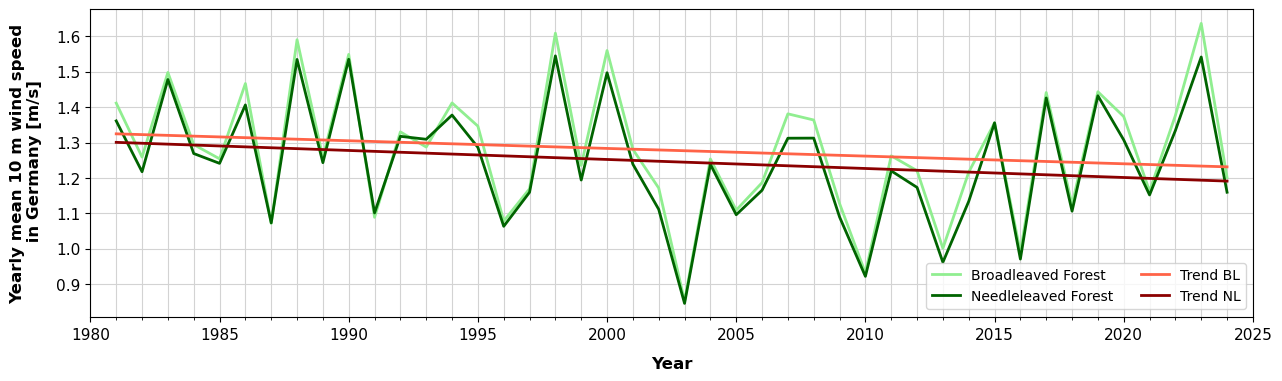

In [30]:
# plot evolution of yearly windspeed across time
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('year', 'GER', data=wind_BL, color='lightgreen', linewidth=2, linestyle='-', label="Broadleaved Forest")
ax.plot('year', 'GER', data=wind_NL, color='darkgreen', linewidth=2, linestyle='-', label="Needleleaved Forest")
ax.plot(wind_BL["year"], fit_wind_BL_fun(wind_BL['year']), color='tomato', linewidth=2, linestyle='-', label = "Trend BL")
ax.plot(wind_NL["year"], fit_wind_NL_fun(wind_NL['year']), color='darkred', linewidth=2, linestyle='-', label = "Trend NL")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean 10 m wind speed\n in Germany [m/s]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(1, 0.2), ncol = 2)
plt.savefig("./Figures/Windspeed_Yearly_GER.png", bbox_inches="tight")

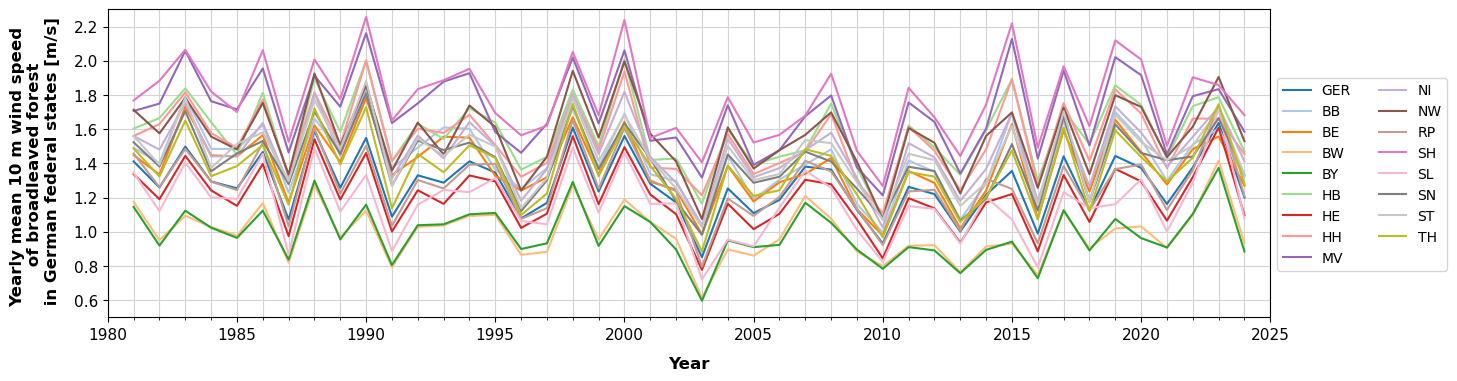

In [31]:
# plot evolution of yearly wind speed in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
wind_BL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean 10 m wind speed \n of broadleaved forest \n in German federal states [m/s]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.5, 2.3)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/Windspeed_Yearly_States_BL.png", bbox_inches="tight")

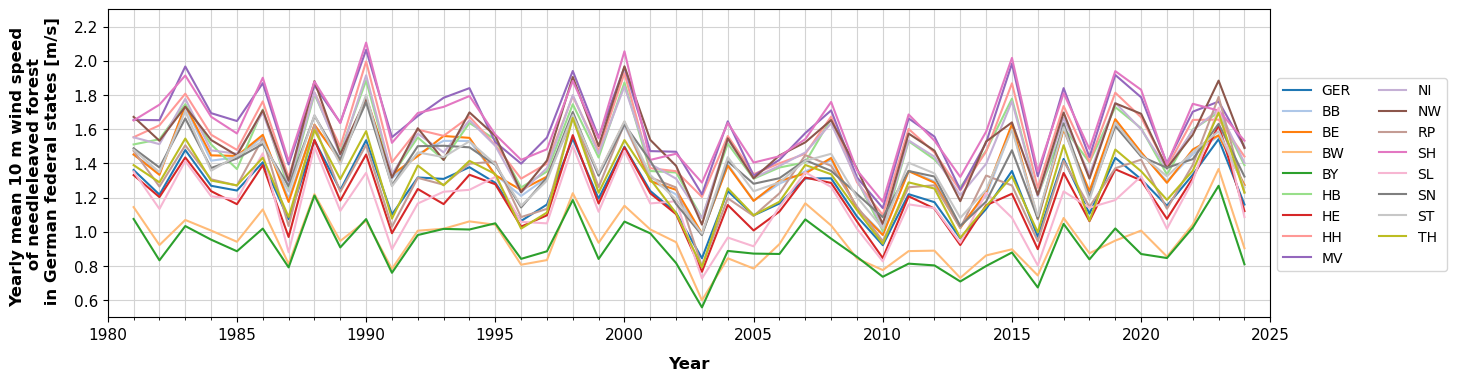

In [32]:
# plot evolution of yearly wind speed in federal states over time
fig, ax = plt.subplots(figsize=(15,4))
colors = plt.cm.tab20.colors
wind_NL.plot(x = "year", ax = ax, linewidth = 1.5, color = colors)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean 10 m wind speed \n of needleleaved forest \n in German federal states [m/s]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(0.5, 2.3)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8), ncol=2)
plt.savefig("./Figures/Windspeed_Yearly_States_NL.png", bbox_inches="tight")

In [33]:
# read yearly mean soil moisture data
swvl1_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_1_Yearly_Spatial_Means_BL.csv")
swvl1_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_1_Yearly_Spatial_Means_NL.csv")
swvl2_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_2_Yearly_Spatial_Means_BL.csv")
swvl2_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_2_Yearly_Spatial_Means_NL.csv")
swvl3_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_3_Yearly_Spatial_Means_BL.csv")
swvl3_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_3_Yearly_Spatial_Means_NL.csv")
swvl4_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_4_Yearly_Spatial_Means_BL.csv")
swvl4_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_4_Yearly_Spatial_Means_NL.csv")

In [34]:
# add column with year
swvl1_BL["year"] = swvl1_BL["time"].str[0:4].astype(int)
swvl1_NL["year"] = swvl1_NL["time"].str[0:4].astype(int)
swvl2_BL["year"] = swvl2_BL["time"].str[0:4].astype(int)
swvl2_NL["year"] = swvl2_NL["time"].str[0:4].astype(int)
swvl3_BL["year"] = swvl3_BL["time"].str[0:4].astype(int)
swvl3_NL["year"] = swvl3_NL["time"].str[0:4].astype(int)
swvl4_BL["year"] = swvl4_BL["time"].str[0:4].astype(int)
swvl4_NL["year"] = swvl4_NL["time"].str[0:4].astype(int)

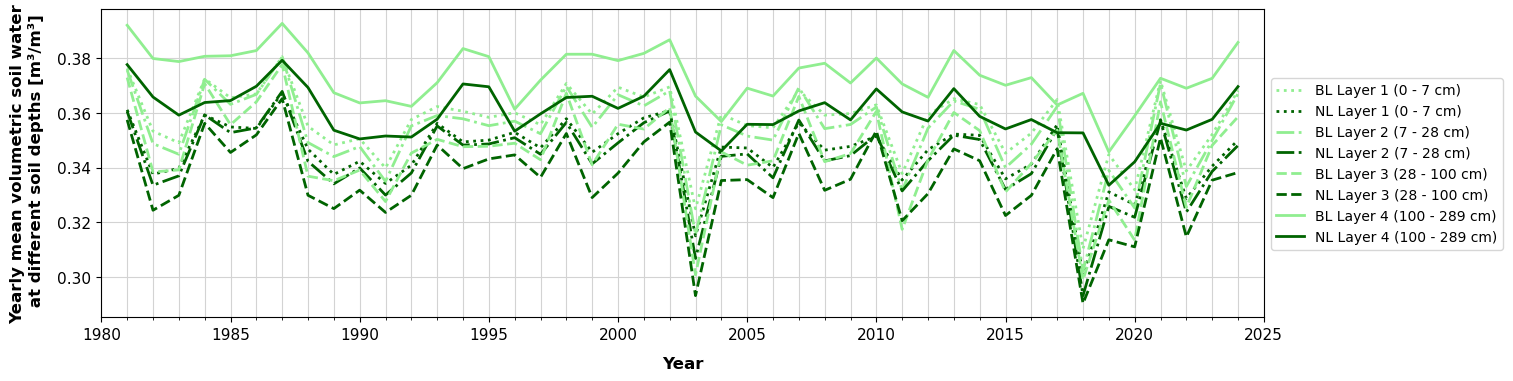

In [35]:
# plot evolution of yearly windspeed across time
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('year', 'GER', data=swvl1_BL, color='lightgreen', linewidth=2, linestyle=':', label="BL Layer 1 (0 - 7 cm)")
ax.plot('year', 'GER', data=swvl1_NL, color='darkgreen', linewidth=2, linestyle=':', label="NL Layer 1 (0 - 7 cm)")
ax.plot('year', 'GER', data=swvl2_BL, color='lightgreen', linewidth=2, linestyle='-.', label="BL Layer 2 (7 - 28 cm)")
ax.plot('year', 'GER', data=swvl2_NL, color='darkgreen', linewidth=2, linestyle='-.', label="NL Layer 2 (7 - 28 cm)")
ax.plot('year', 'GER', data=swvl3_BL, color='lightgreen', linewidth=2, linestyle='--', label="BL Layer 3 (28 - 100 cm)")
ax.plot('year', 'GER', data=swvl3_NL, color='darkgreen', linewidth=2, linestyle='--', label="NL Layer 3 (28 - 100 cm)")
ax.plot('year', 'GER', data=swvl4_BL, color='lightgreen', linewidth=2, linestyle='-', label="BL Layer 4 (100 - 289 cm)")
ax.plot('year', 'GER', data=swvl4_NL, color='darkgreen', linewidth=2, linestyle='-', label="NL Layer 4 (100 - 289 cm)")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Yearly mean volumetric soil water\n at different soil depths [m³/m³]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=2, fontsize=10,  bbox_to_anchor=(1, 0.8))
plt.savefig("./Figures/Soil_Water_Yearly_GER.png", bbox_inches="tight")